<a href="https://colab.research.google.com/github/AbrarBorger/Comparative-Analysis-of-VADER-and-RoBERTa-Models-on-Amazon-Reviews-Sentiments/blob/main/ABSA_AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk


In [12]:
df = pd.read_csv('Reviews.csv')
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

Id                        0
ProductId                 0
UserId                    0
ProfileName               2
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [14]:
df = df.head(500)

In [15]:
df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


<function matplotlib.pyplot.show(close=None, block=None)>

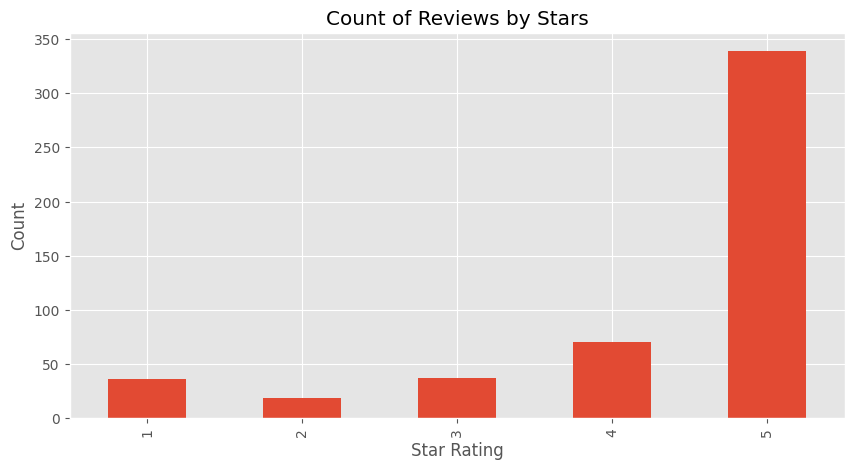

In [16]:
ax= df['Score'].value_counts().sort_index() \
      .plot(kind='bar', title = 'Count of Reviews by Stars',
            figsize =(10,5))

ax.set_xlabel ('Star Rating')
ax.set_ylabel ('Count')
plt.show

#NLTK Initialization

In [17]:
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
example = df['Text'][69]
print(example)

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


#Tokenization

In [19]:
tokens = nltk.word_tokenize (example)
tokens[:10]

['this', 'was', 'sooooo', 'deliscious', 'but', 'too', 'bad', 'i', 'ate', 'em']

#POS Tagging

In [20]:
tagged = nltk.pos_tag(tokens)
tagged[:150]

[('this', 'DT'),
 ('was', 'VBD'),
 ('sooooo', 'JJ'),
 ('deliscious', 'JJ'),
 ('but', 'CC'),
 ('too', 'RB'),
 ('bad', 'JJ'),
 ('i', 'JJ'),
 ('ate', 'NN'),
 ('em', 'NN'),
 ('too', 'RB'),
 ('fast', 'RB'),
 ('and', 'CC'),
 ('gained', 'VBD'),
 ('2', 'CD'),
 ('pds', 'NN'),
 ('!', '.'),
 ('my', 'PRP$'),
 ('fault', 'NN')]

#Named Entity Recognition

In [21]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  this/DT
  was/VBD
  sooooo/JJ
  deliscious/JJ
  but/CC
  too/RB
  bad/JJ
  i/JJ
  ate/NN
  em/NN
  too/RB
  fast/RB
  and/CC
  gained/VBD
  2/CD
  pds/NN
  !/.
  my/PRP$
  fault/NN)


#Run VADER on the dataset

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores ("I am very happy" )

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [24]:
sia.polarity_scores ("This is the worst food ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
sia.polarity_scores(example)

{'neg': 0.344, 'neu': 0.52, 'pos': 0.136, 'compound': -0.7345}

In [26]:
res = {}
for i, row in tqdm(df.iterrows(), total = len (df)):
    text= row ['Text']
    myid= row ['Id']
    res [myid]= sia.polarity_scores (text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [27]:
vaders= pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns ={'index':'Id'})
vaders=vaders.merge(df, how='left')

In [21]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Compound Scores for Amazon Reviews')

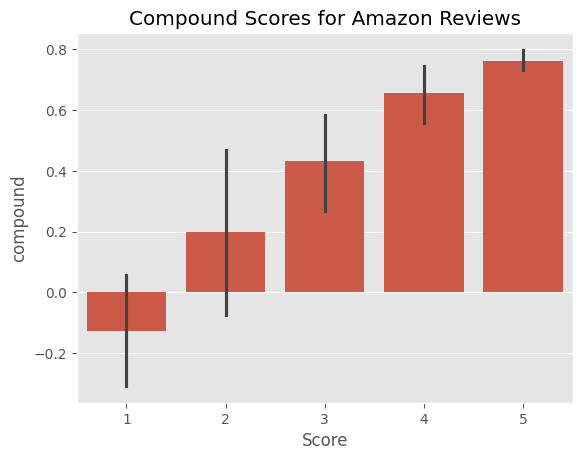

In [28]:
ax= sns.barplot(data=vaders, x= 'Score', y='compound')
ax.set_title ('Compound Scores for Amazon Reviews')

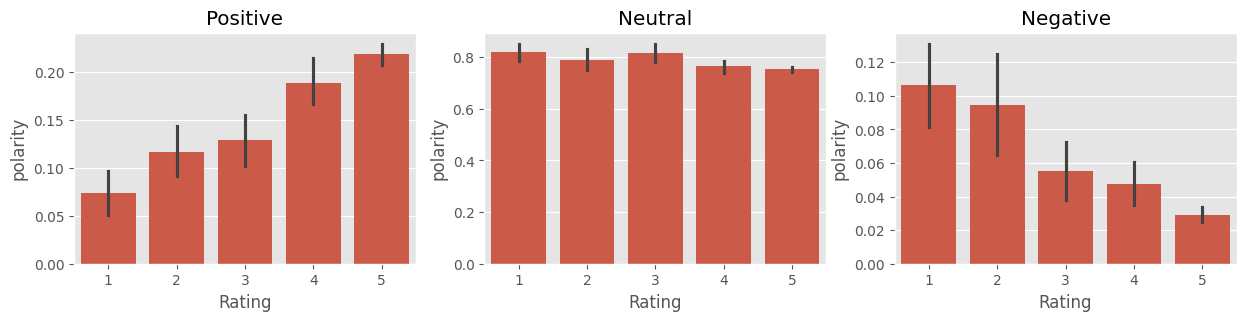

In [29]:
fig, axs = plt.subplots (1,3 ,figsize=(15,3))
sns.barplot(data=vaders, x= 'Score', y='pos', ax=axs [0])
sns.barplot(data=vaders, x= 'Score', y='neu', ax=axs [1])
sns.barplot(data=vaders, x= 'Score', y='neg', ax=axs [2])
axs[0].set_title ('Positive')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('polarity')

axs[1].set_title ('Neutral')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('polarity')

axs[2].set_title ('Negative')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('polarity')

plt.show()

#Run RoBERTa on the dataset

In [30]:
!pip install torch
!pip install tensorflow
!pip install flax
!pip install --upgrade tensorflow-intel
!pip install ml-dtypes==0.2.0

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [33]:
print (example)
sia.polarity_scores (example )

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


{'neg': 0.344, 'neu': 0.52, 'pos': 0.136, 'compound': -0.7345}

In [34]:
encoded_text = tokenizer (example, return_tensors= 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores [0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
}
print (scores_dict)

{'roberta_neg': 0.96015793, 'roberta_neu': 0.035429034, 'roberta_pos': 0.0044129603}


In [35]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer (example, return_tensors= 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores [0],
        'roberta_neu' : scores [1],
        'roberta_pos' : scores [2]
    }
    return (scores_dict)

In [36]:
res = {}
for i, row in tqdm(df.iterrows(), total = len (df)):
    try:
        text= row ['Text']
        myid= row ['Id']
        vader_result= sia.polarity_scores(text)
        vader_result_rename = {}
        for key , value in vader_result.items():
            vader_result_rename [f"vader_{key}"]= value
        roberta_result = polarity_scores_roberta(text)
        both= {**vader_result_rename,**roberta_result}
        res[myid]=both
    except RuntimeError :
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [42]:
roberta_results_df = pd.DataFrame(res)

# Display the DataFrame
print(roberta_results_df)

                     1         2         3         4         5         6    \
vader_neg       0.000000  0.138000  0.091000  0.000000  0.000000  0.029000   
vader_neu       0.695000  0.862000  0.754000  1.000000  0.552000  0.809000   
vader_pos       0.305000  0.000000  0.155000  0.000000  0.448000  0.163000   
vader_compound  0.944100 -0.566400  0.826500  0.000000  0.946800  0.883000   
roberta_neg     0.009624  0.508986  0.003229  0.002295  0.001635  0.006130   
roberta_neu     0.049980  0.452413  0.098067  0.090219  0.010302  0.021796   
roberta_pos     0.940396  0.038600  0.898704  0.907486  0.988063  0.972074   

                     7         8         9         10   ...       491  \
vader_neg       0.034000  0.000000  0.000000  0.000000  ...  0.055000   
vader_neu       0.693000  0.520000  0.851000  0.705000  ...  0.704000   
vader_pos       0.273000  0.480000  0.149000  0.295000  ...  0.241000   
vader_compound  0.934600  0.948700  0.636900  0.831300  ...  0.928700   
roberta_ne

In [55]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397573,
 'roberta_neu': 0.01132722,
 'roberta_pos': 0.986233}

In [56]:
results_df= pd.DataFrame(res).T
results_df= results_df.reset_index().rename(columns ={'index':'Id'})
results_df=results_df.merge(df, how='left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940396,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


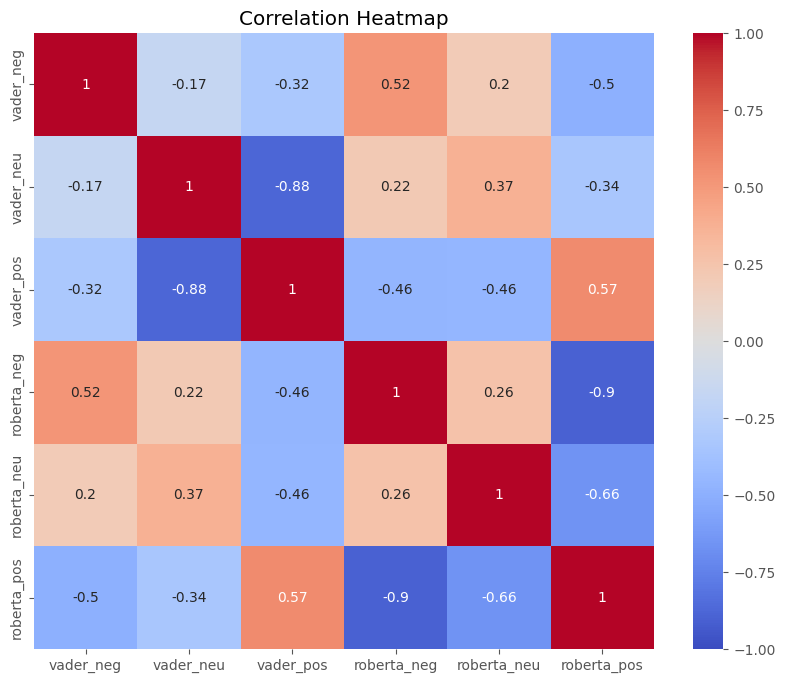

In [61]:
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr = results_df[['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-65-5e375ef57d25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, 0], x='Score', y='vader_neg', data=results_df, palette='tab10')
<ipython-input-65-5e375ef57d25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, 1], x='Score', y='vader_neu', data=results_df, palette='tab10')
<ipython-input-65-5e375ef57d25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, 2], x='Score', y='vader_pos', data=results_df, palette='tab10')
<ipython-input-65-5e375ef57d25>:6: FutureWarning: 

Passing `palette` 

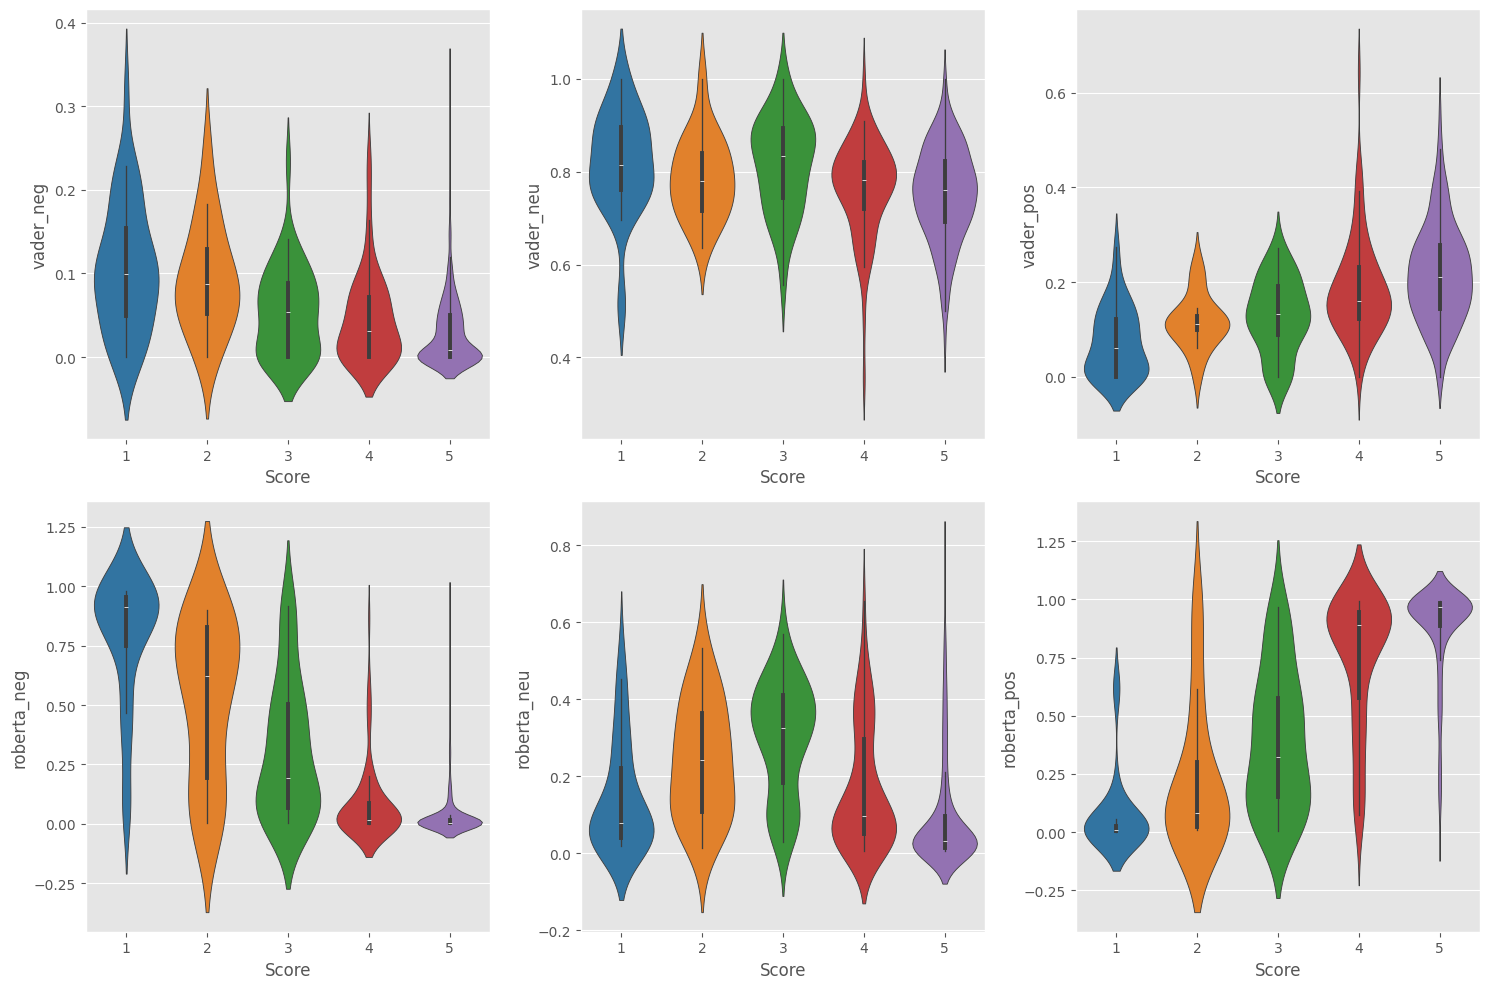

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.violinplot(ax=axes[0, 0], x='Score', y='vader_neg', data=results_df, palette='tab10')
sns.violinplot(ax=axes[0, 1], x='Score', y='vader_neu', data=results_df, palette='tab10')
sns.violinplot(ax=axes[0, 2], x='Score', y='vader_pos', data=results_df, palette='tab10')
sns.violinplot(ax=axes[1, 0], x='Score', y='roberta_neg', data=results_df, palette='tab10')
sns.violinplot(ax=axes[1, 1], x='Score', y='roberta_neu', data=results_df, palette='tab10')
sns.violinplot(ax=axes[1, 2], x='Score', y='roberta_pos', data=results_df, palette='tab10')

plt.tight_layout()
plt.show()


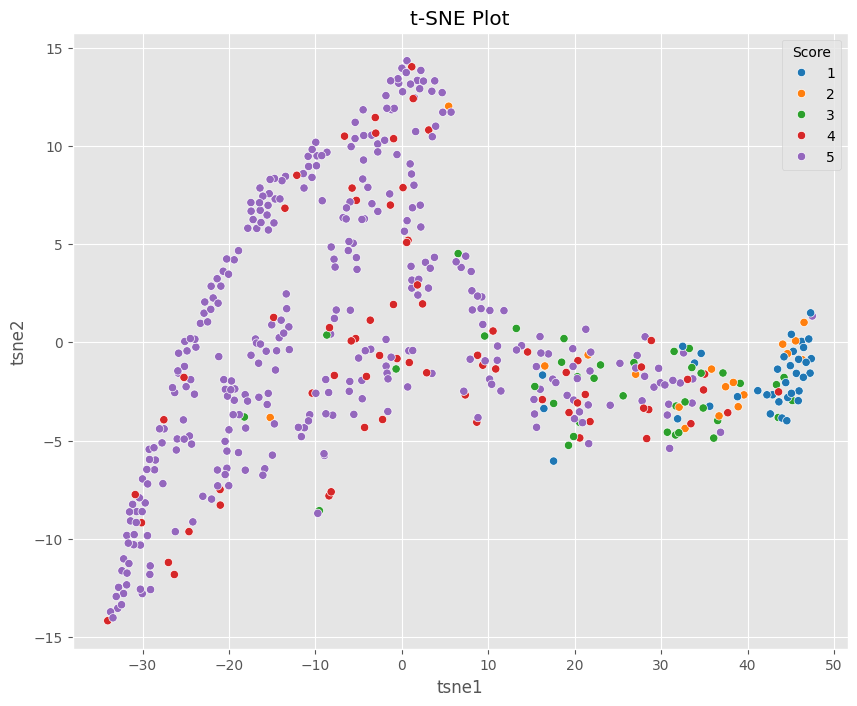

In [70]:
from sklearn.manifold import TSNE

# Prepare data for t-SNE
data_tsne = results_df[['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos']]
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_tsne)

# Create a dataframe with t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['Score'] = results_df['Score']

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne1', y='tsne2', hue='Score', data=tsne_df, palette='tab10')
plt.title('t-SNE Plot')
plt.show()


#sample queries

In [ ]:
results_df.query('Score == 1').sort_values ('roberta_pos', ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1').sort_values ('vader_pos', ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5').sort_values ('roberta_neg', ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5').sort_values ('vader_neg', ascending = False)['Text'].values[0]

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline ("sentiment-analysis")

In [ ]:
sent_pipeline ('I hate people pleasing' )

In [ ]:
sent_pipeline ('I love dogs' )

In [ ]:
sent_pipeline ('Subscribe to my channel' )

In [ ]:
sent_pipeline ('I kinda dislike life.' )

In [ ]:
sent_pipeline ('I dont know how to feel about life' )